In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv(r"C:\Users\chevu\Downloads\Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [12]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [18]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [22]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [23]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [24]:
df.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [25]:
df.shape

(200, 5)

In [26]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [28]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [30]:
high_income = df[df['Annual Income (k$)'] > 100]
print(high_income)


     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
186         187  Female   54                 101                      24
187         188    Male   28                 101                      68
188         189  Female   41                 103                      17
189         190  Female   36                 103                      85
190         191  Female   34                 103                      23
191         192  Female   32                 103                      69
192         193    Male   33                 113                       8
193         194  Female   38                 113                      91
194         195  Female   47                 120                      16
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137   

In [31]:
high_spend = df[df['Spending Score (1-100)'] > 80]
print(high_spend)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
1             2    Male   21                  15                      81
7             8  Female   23                  18                      94
11           12  Female   35                  19                      99
19           20  Female   35                  23                      98
25           26    Male   29                  28                      82
29           30  Female   23                  29                      87
33           34    Male   18                  33                      92
35           36  Female   21                  33                      81
41           42    Male   24                  38                      92
123         124    Male   39                  69                      91
127         128    Male   40                  71                      95
135         136  Female   29                  73                      88
141         142    Male   32                  75   

In [32]:
df.groupby('Gender')['Spending Score (1-100)'].mean()

Gender
Female    51.526786
Male      48.511364
Name: Spending Score (1-100), dtype: float64

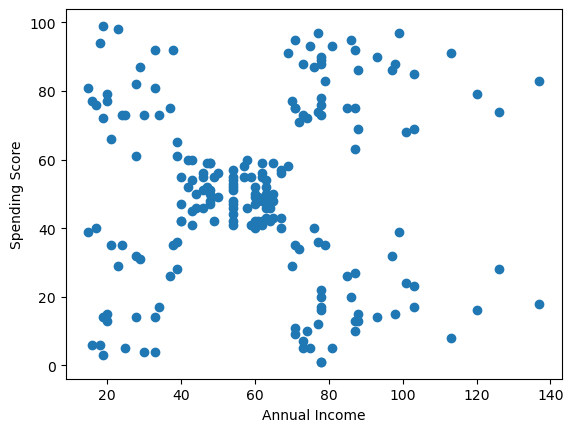

In [33]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

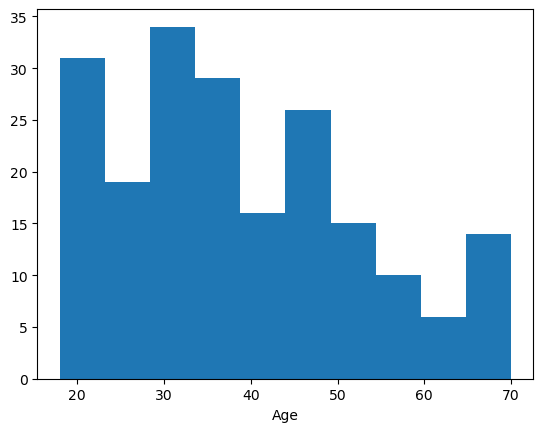

In [34]:
plt.hist(df['Age'], bins=10)
plt.xlabel("Age")
plt.show()

In [35]:
from sklearn.cluster import KMeans

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


C:\code unnati program\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


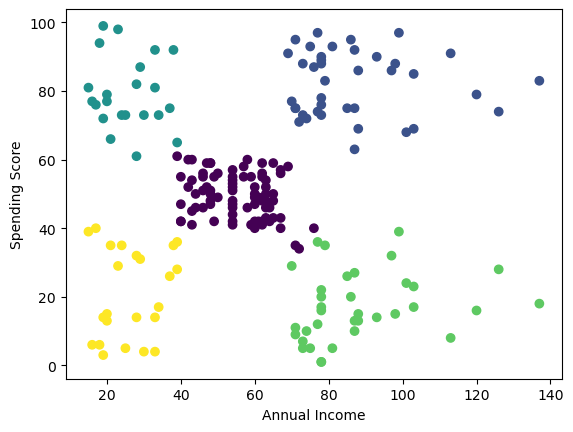

In [36]:
plt.scatter(df['Annual Income (k$)'],
            df['Spending Score (1-100)'],
            c=df['Cluster'])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()